### Linear Model 예측하고자 하는 모델이 수치형 일때

In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.19.2
3.3.2


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn

### 특성이 하나 일때의 선형 함수

w[0]: 0.393906  b: -0.031804


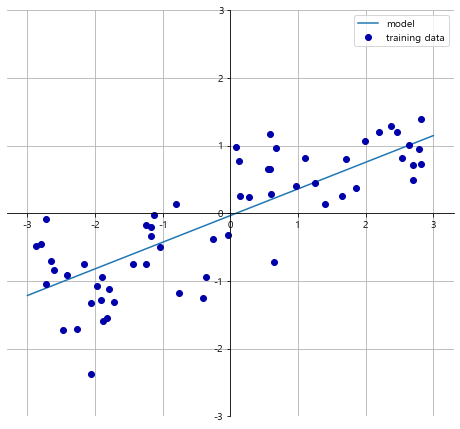

In [6]:
mglearn.plots.plot_linear_regression_wave()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
X = boston.data   # 입력 - 문제
y = boston.target   # 출력 - 답

### 데이터 나누기
 * 학습 데이터
 * 테스트 데이터

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42)

In [45]:
# model = LinearRegression().fit(X_train, y_train)
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

In [46]:
### MAE : Mean Absolute Error
### MSE : Mean Squared Error
### RMSE : Root Mean Squared Error
### RMLSE :  Root Mean Square Logarithmic Error

In [47]:
import pandas as pd

In [48]:
dict_dat = {'실제값':y_test, '예측값':pred, '오차':y_test - pred,
            '오차절대값':abs(y_test - pred), '오차제곱':((y_test - pred)**2),
           'MAE':(mean_absolute_error(y_test, pred))}

dat = pd.DataFrame(dict_dat)
dat

,실제값,예측값,오차,오차절대값,오차제곱,MAE
0,23.6,28.838854,-5.238854,5.238854,27.445587,3.06094
1,32.4,36.007833,-3.607833,3.607833,13.016458,3.06094
2,13.6,15.083248,-1.483248,1.483248,2.200023,3.06094
3,22.8,25.230909,-2.430909,2.430909,5.909318,3.06094
4,16.1,18.878641,-2.778641,2.778641,7.720844,3.06094
...,...,...,...,...,...,...
122,8.8,3.284209,5.515791,5.515791,30.423951,3.06094
123,19.2,23.798796,-4.598796,4.598796,21.148926,3.06094
124,25.3,25.733299,-0.433299,0.433299,0.187748,3.06094
125,20.4,23.048156,-2.648156,2.648156,7.012731,3.06094


In [49]:
dat.shape

(127, 6)

In [50]:
### MAE
mae_val = dat['오차절대값'].sum()/dat.shape[0]
mae_val

3.060939595437034

In [51]:
### MSE
mse_val = dat['오차제곱'].sum()/dat.shape[0]
mse_val

22.098694827098036

In [52]:
### RMSE
rmse_val = mse_val ** 0.5
rmse_val

4.700924890603766

In [53]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(abs(y_test), abs(pred)))

0.2889042336440167

In [54]:
# R^2의 값을 구하기- 결정계수 구하기
print("훈련 데이터 세트 점수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(model.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.75
테스트 데이터 세트 점수 : 0.68


In [57]:
for i in range(1, 10, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i/10), random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred[:5]
    
    mae = np.abs(y_test - pred).sum() / len(pred)
    mse = ((y_test - pred)**2).sum()/len(pred)
    rmse = (((y_test - pred)**2).sum()/len(pred))**0.5
    
    print("test_size : ",(i/10))
    print("MAE : {:.3f}".format(mae))
    print("MSE : {:.3f}".format(mse))
    print("RMSE : {:.3f}".format(rmse))
    print("")

test_size :  0.1
MAE : 2.834
MSE : 14.996
RMSE : 3.872

test_size :  0.2
MAE : 3.189
MSE : 24.291
RMSE : 4.929

test_size :  0.3
MAE : 3.163
MSE : 21.517
RMSE : 4.639

test_size :  0.4
MAE : 3.298
MSE : 21.833
RMSE : 4.673

test_size :  0.5
MAE : 3.398
MSE : 25.175
RMSE : 5.018

test_size :  0.6
MAE : 3.417
MSE : 24.249
RMSE : 4.924

test_size :  0.7
MAE : 3.360
MSE : 25.692
RMSE : 5.069

test_size :  0.8
MAE : 3.542
MSE : 25.564
RMSE : 5.056

test_size :  0.9
MAE : 3.739
MSE : 28.014
RMSE : 5.293

